In [4]:
import pandas as pd
import numpy as np
data = pd.read_csv("Musique/spam.csv",encoding='latin-1')
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

data.columns =['label','body']
data.head()
pd.set_option('display.max_colwidth', 0) 
print("sample messages from human")
print(data[data['label']=='ham']['body'].head(15))
print("sample messages which are spam")
print(data[data['label']=='spam']['body'].head(15))

sample messages from human
0     Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...                                                                                     
1     Ok lar... Joking wif u oni...                                                                                                                                                                       
3     U dun say so early hor... U c already then say...                                                                                                                                                   
4     Nah I don't think he goes to usf, he lives around here though                                                                                                                                       
6     Even my brother is not like to speak with me. They treat me like aids patent.                                                                              

In [5]:
#Write a clean function
import string
import nltk
#ps = nltk.PorterStemmer()
stopwords= nltk.corpus.stopwords.words('english')

def clean(sentence):
    s = "".join(x for x in sentence if x not in string.punctuation)
    temp = s.lower().split(' ')
    temp2 = [x for x in temp if x not in stopwords]
    return temp2
clean("hell peOople  are hOOow ! AAare ! you. enough.. are")

['hell', 'peoople', '', 'hooow', '', 'aaare', '', 'enough']

In [6]:
# Create a vectorizer & Transform into column features
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(analyzer=clean)
vector_output = vect.fit_transform(data['body'])

print(vect.get_feature_names()[0:100])
# these numbers are the columns

['', '\rham', '0', '008704050406', '0089my', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18s', '0870', '08700621170150p', '

In [7]:
print (vector_output [0:10])

  (0, 3750)	0.15133352947689135
  (0, 4646)	0.3328581634691494
  (0, 6378)	0.26034665364508613
  (0, 2465)	0.2577757346943601
  (0, 1377)	0.2531117123219365
  (0, 1842)	0.28119992157437884
  (0, 5626)	0.18060020249787317
  (0, 3847)	0.18526422487029676
  (0, 9110)	0.2295416796796082
  (0, 4805)	0.28119992157437884
  (0, 2990)	0.197308809001304
  (0, 1840)	0.3177490962883377
  (0, 2180)	0.28119992157437884
  (0, 3807)	0.15637062087310694
  (0, 1144)	0.3328581634691494
  (0, 8873)	0.18978656059026505
  (1, 5942)	0.26882560211761686
  (1, 4844)	0.40008134760891295
  (1, 4614)	0.5131068016016297
  (1, 9006)	0.42291454310909804
  (1, 8536)	0.1966685613873965
  (1, 5974)	0.5355874226308133
  (2, 3541)	0.11445159563532871
  (2, 3125)	0.35533198564645746
  (2, 417)	0.0993576941536962
  :	:
  (8, 6540)	0.17889914242895302
  (8, 6948)	0.25640290443704256
  (8, 2186)	0.34063012321413483
  (8, 1908)	0.11533801433532143
  (8, 220)	0.2943229069695556
  (8, 2247)	0.21371446699888033
  (8, 4761)	0.294

In [8]:
pd.DataFrame(vector_output.toarray())

,0,1,2,3,4,5,6,7,8,9,...,9424,9425,9426,9427,9428,9429,9430,9431,9432,9433
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
6,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [9]:
#Feature engineering
import re
data['len'] = data['body'].apply(lambda x : len(x) - x.count(" "))
# METHOD 2  : data['len'] = data['body'].apply(lambda x : len(re.split('\s+',x)))
#print(data['body'][1]+"  - "+str(data['len'][1]))

In [10]:
test = "Hello people this is my contact 999999999 222 888888888 20000002222"
len(re.findall('\d{7,}',test))
# for finding numbers with digits 4,5,6,7 we will write \d{4,7}
# for finding numbers with digits 7,8,9,10 .... and many more . We will write \d{7,}

3

In [11]:
data['long_number'] = data['body'].apply(lambda x : len(re.findall('\d{7,}',x)))
data['short_number'] = data['body'].apply(lambda x : len(re.findall('\d{4,6}',x)))

#data[data['label']=='spam']
#a=data.iloc[8,1]

In [12]:
import string
def count_punct (text):
    count = sum([1 for x in text if x in string.punctuation])
    pp = round(100*count/(len(text)-text.count(" ")),3)
    return pp

data['punct'] = data['body'].apply(lambda x : count_punct(x))

testlink = "hello buddwwy http how com are you.co ww ww."

def  website (text):
    if (len(re.findall('www|http|com|\.co',text))>0):
        return 1
    else:
        return 0

#pd.set_option('display.max_colwidth', 0) 
#pd.DataFrame(data[data['label']=='spam']['body'])
print(website(testlink))
data['website'] = data['body'].apply(lambda x : website(x))
#pd.DataFrame(data[data['label']=='spam'])

1


/home/soumana/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


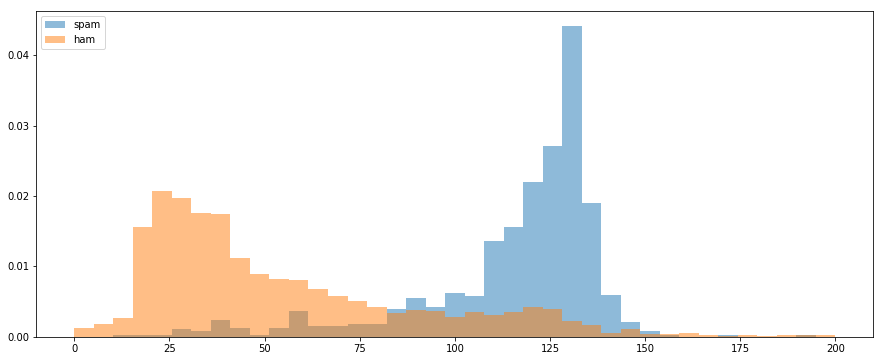

In [13]:
 #How do these features look like ?
    # how do they look like ? 
#1 len
from matplotlib import pyplot
%matplotlib inline
pyplot.figure(figsize=(15,6))

bins = np.linspace(0,200,num=40)
pyplot.hist(data[data['label']=='spam']['len'],bins,alpha=0.5,label='spam',normed=True)
pyplot.hist(data[data['label']=='ham']['len'],bins,alpha =0.5,label ='ham', normed=True)
pyplot.legend(loc ='upper left')
pyplot.show()

<function matplotlib.pyplot.show(*args, **kw)>

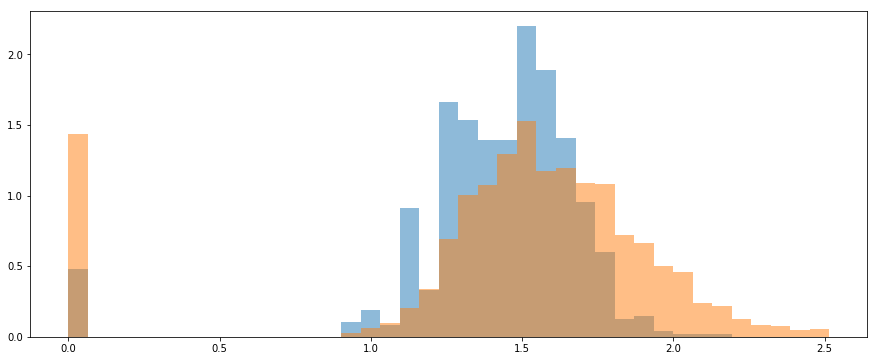

In [14]:
# punctuation 
pyplot.figure(figsize=(15,6))
i=4
bins = np.linspace(0,40**(1/i),num=40)
pyplot.hist(data[data['label']=='spam']['punct']**(1/i),bins,normed=True,label ='spam',alpha=0.5)
pyplot.hist(data[data['label']=='ham']['punct']**(1/i),bins, normed = True, label='ham',alpha=0.5)
pyplot.show

#using box cox transformation to see if the data reveal distinction

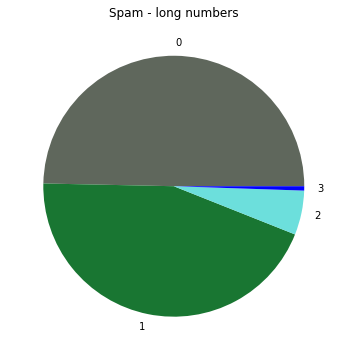

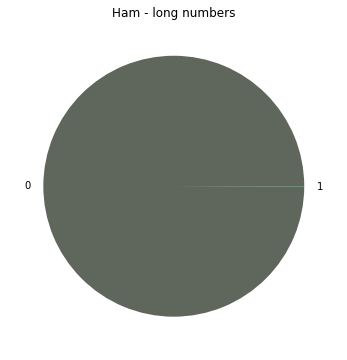

In [15]:
# Numbers

pyplot.figure(figsize=(6,6))
pyplot.pie(data[data['label']=='spam']['long_number'].value_counts(),labels=['0','1','2','3'], 
           colors=['#5f675c','#197632','#6cdfdc','blue'],)
pyplot.title("Spam - long numbers")
pyplot.show()


pyplot.figure(figsize=(6,6))
pyplot.pie(data[data['label']=='ham']['long_number'].value_counts(),labels=['0','1'], 
           colors=['#5f675c','#197632'],)
pyplot.title("Ham - long numbers")
pyplot.show()

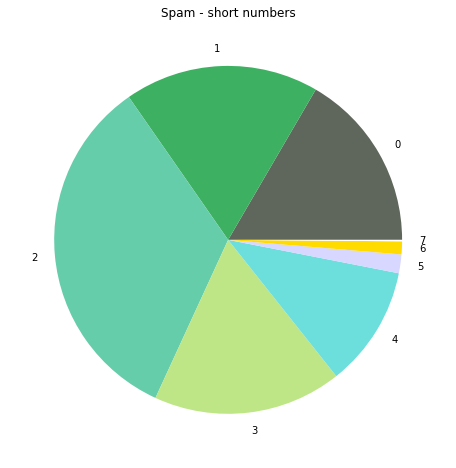

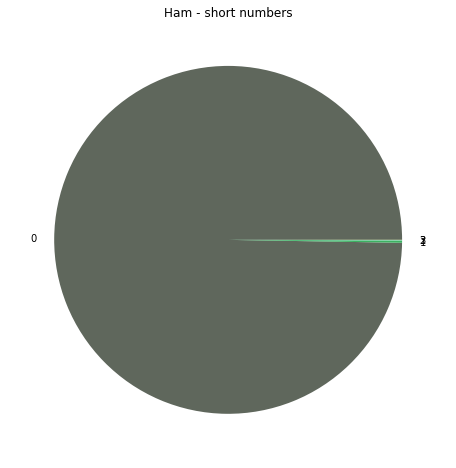

In [16]:
# short Numbers
green_pallete = ['#5f675c','#3db161','#66cdaa','#bee687','#6cdfdc','#d7d7ff','#ffdb00','white']

spam_x = data[data['label']=='spam']['short_number'].value_counts()
spam_x.sort_index(inplace=True)
pyplot.figure(figsize=(8,8))
pyplot.pie(spam_x,labels=spam_x.index,startangle=0,colors=green_pallete)
pyplot.title("Spam - short numbers")
pyplot.show()

ham_x = data[data['label']=='ham']['short_number'].value_counts()
ham_x.sort_index(inplace=True)
pyplot.figure(figsize=(8,8))
pyplot.pie(ham_x,labels=ham_x.index, colors=green_pallete)
pyplot.title("Ham - short numbers")
pyplot.show()

In [ ]:
x_features = pd.concat([data['len'],data['long_number'],data['short_number'],data['punct'],data['website'],pd.DataFrame(vector_output.toarray())],axis=1)
#,pd.DataFrame(vector_output.toarray())
#,data['long_number'],data['short_number']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score

x_train, x_test, y_train, y_test = train_test_split(x_features,data['label'])
rf = RandomForestClassifier(n_estimators=100,max_depth=None,n_jobs=-1)
rf_model = rf.fit(x_train,y_train)
sorted(zip(rf_model.feature_importances_,x_train.columns),reverse=True)[0:20]

In [ ]:
y_pred=rf_model.predict(x_test)
precision,recall,fscore,support =score(y_test,y_pred,pos_label='spam', average ='binary')
print('Precision : {} / Recall : {} / fscore : {} / Accuracy: {}'.format(round(precision,3),round(recall,3),round(fscore,3),round((y_pred==y_test).sum()/len(y_test),3)))